<a href="https://colab.research.google.com/github/pyohamen/yonsei/blob/master/4-1_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8/Code/Code06_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan 데이터 분류모형 예측성능 비교

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 로컬에서 수행시
df = pd.read_csv('../Data/loan.csv')

In [4]:
# 코랩에서 수행시
url = 'https://raw.githubusercontent.com/pyohamen/yonsei/master/4-1_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8/Data/loan.csv'
df = pd.read_csv(url)

In [5]:
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})

In [6]:
X = df.drop(['y'], axis=1)
y = df['y']
xname = X.columns
yname = ['Normal','Bad']

## Train/Test 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

## Bagging 방법

In [8]:
from sklearn.ensemble import BaggingClassifier

In [9]:
bag_tree = BaggingClassifier(n_estimators=100, random_state=0)
bag_tree.fit(X_train, y_train)
bag_prob = bag_tree.predict_proba(X_test) # 투표결과를 출력해보자
bag_prob

array([[0.2 , 0.8 ],
       [1.  , 0.  ],
       [0.92, 0.08],
       ...,
       [0.02, 0.98],
       [0.88, 0.12],
       [0.52, 0.48]])

In [10]:
# 로지스틱에 bagging 을 적용해보자
from sklearn.linear_model import LogisticRegression
bag_logit = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000),n_estimators=100,random_state=0) # 시간을 줄이기 위해 max_iter=1000
bag_logit.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=None,

In [11]:
bag_prob = bag_logit.predict_proba(X_test) # 투표결과
bag_prob

array([[0.75671118, 0.24328882],
       [0.82224338, 0.17775662],
       [0.80412719, 0.19587281],
       ...,
       [0.43214763, 0.56785237],
       [0.26445609, 0.73554391],
       [0.53195819, 0.46804181]])

## Random Forest 방법

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_sqrt = RandomForestClassifier(n_estimators=100,max_features="sqrt",random_state=0)
rf_sqrt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_five = RandomForestClassifier(n_estimators=100,max_features=5,random_state=0)
rf_five.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## 다른 분류방법과의 비교

### 로지스틱 회귀분석

In [14]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0, max_iter = 1000) # bagging 안 한 것
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 신경망분석

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
c_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0, max_iter = 1000)
c_nn.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### SVM

In [16]:
from sklearn import svm
c_svm = svm.SVC(kernel='rbf', random_state=0)
c_svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### ROC 곡선 및 AUC

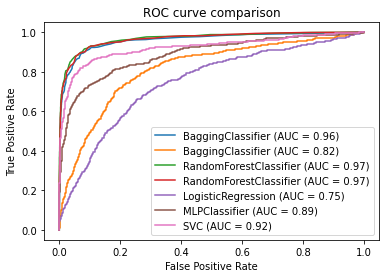

In [17]:
from sklearn.metrics import plot_roc_curve
m1_roc=plot_roc_curve(bag_tree, X_test, y_test)
plot_roc_curve(bag_logit, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(rf_sqrt, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(rf_five, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(logit, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_nn, X_test_scaled, y_test, ax = m1_roc.ax_)
plot_roc_curve(c_svm, X_test_scaled, y_test, ax = m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()

## 변수중요도 (랜덤포레스트)

In [18]:
rf_sqrt.feature_importances_

array([0.10043004, 0.08492974, 0.04168402, 0.0563441 , 0.23379407,
       0.10731938, 0.10764598, 0.0794902 , 0.18836247])

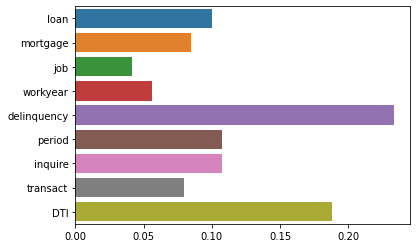

In [19]:
sns.barplot(x=rf_sqrt.feature_importances_, y=xname)
plt.show()

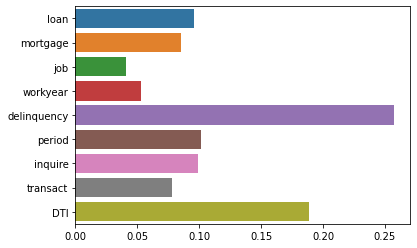

In [20]:
rf_five.feature_importances_
sns.barplot(x=rf_five.feature_importances_, y=xname)
plt.show()